<a href="https://colab.research.google.com/github/JayavardhaniKathika/Flixster/blob/master/ClusteringAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

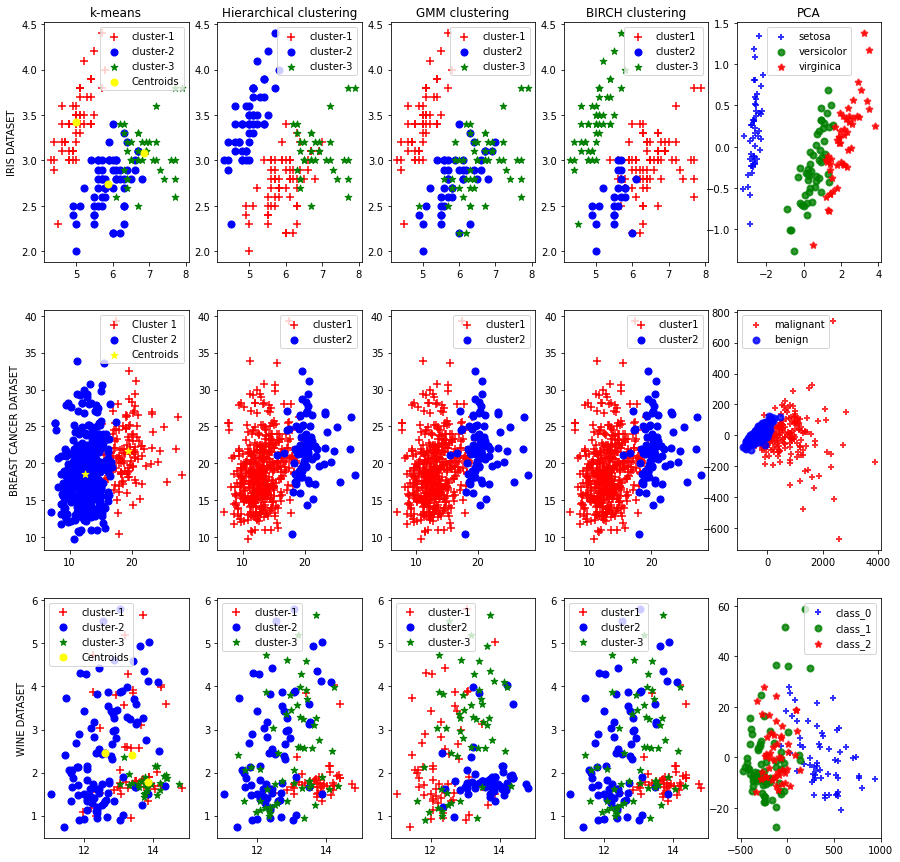

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
iris = datasets.load_iris()

X = iris.data
y = iris.target
f, ax = plt.subplots(3, 5, figsize=(15,15))
ax[0,0].title.set_text('k-means')
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
ax[0,0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[0,0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[0,0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
# #Plotting the centroids of the clusters
ax[0,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

ax[0,0].legend()
ax[0,0].set_ylabel('IRIS DATASET')

from sklearn.cluster import AgglomerativeClustering
groups=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
groups=groups.fit_predict(X)
ax[0,1].title.set_text('Hierarchical clustering')
ax[0,1].scatter(X[groups == 0, 0], X[groups == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[0,1].scatter(X[groups == 1, 0], X[groups == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[0,1].scatter(X[groups == 2, 0], X[groups == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
ax[0,1].legend()


from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 3)
gmm = gmm.fit(X)
pred_gmm = gmm.predict(X)
ax[0,2].title.set_text('GMM clustering')
ax[0,2].scatter(X[pred_gmm == 0, 0], X[pred_gmm == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster-1')
ax[0,2].scatter(X[pred_gmm == 1, 0], X[pred_gmm == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[0,2].scatter(X[pred_gmm == 2, 0], X[pred_gmm == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')

ax[0,2].legend()


from sklearn.cluster import Birch
brc = Birch(n_clusters=3)
brc.fit(X)
brc=brc.predict(X)
ax[0,3].title.set_text('BIRCH clustering')
ax[0,3].scatter(X[brc == 0, 0], X[brc == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[0,3].scatter(X[brc == 1, 0], X[brc == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[0,3].scatter(X[brc == 2, 0], X[brc == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[0,3].legend()


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
colors = ['blue', 'green', 'red']
markers=['+','o','*']
lw = 2
target_names = iris.target_names
for marker, color, i, target_name in zip(markers,colors, [0,1,2], target_names):
    ax[0,4].scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw,
                label=target_name)
ax[0,4].legend(loc='best', shadow=False, scatterpoints=1)
ax[0,4].title.set_text('PCA')


from sklearn.datasets import load_breast_cancer
cancerData = load_breast_cancer()
X= cancerData.data
y = cancerData.target

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
ax[1,0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', marker='+',label = 'Cluster 1')
ax[1,0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', marker='o',label = 'Cluster 2')
ax[1,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow',marker='*', label = 'Centroids')

ax[1,0].legend()
ax[1,0].set_ylabel('BREAST CANCER DATASET')

groups=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
groups=groups.fit_predict(X)
ax[1,1].scatter(X[groups == 0, 0], X[groups == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[1,1].scatter(X[groups == 1, 0], X[groups == 1, 1], s = 50, c = 'blue', marker='o',label = 'cluster2')
ax[1,1].legend()

gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(X)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X)
ax[1,2].scatter(X[groups == 0, 0], X[groups == 0, 1], s = 50, c = 'red', marker='+',label = 'cluster1')
ax[1,2].scatter(X[groups == 1, 0], X[groups == 1, 1], s = 50, c = 'blue', marker='o',label = 'cluster2')
ax[1,2].legend()

brc = Birch(n_clusters=2)
brc.fit(X)
brc=brc.predict(X)
ax[1,3].scatter(X[brc == 0, 0], X[brc == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[1,3].scatter(X[brc == 1, 0], X[brc == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[1,3].legend()

target_names = cancerData.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
colors = ['red', 'blue']

markers=['+','o']
lw = 2

for marker, color, i, target_name in zip(markers, colors, [0,1],target_names):
    ax[1,4].scatter(X_r[y == i, 0], X_r[y == i, 1], color=color,marker=marker, alpha=.8, lw=lw,
                label=target_name)
ax[1,4].legend(loc='best', shadow=False, scatterpoints=1)






from sklearn.datasets import load_wine
wine=load_wine()
X = wine.data
y = wine.target

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
ax[2,0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[2,0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[2,0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
# #Plotting the centroids of the clusters
ax[2,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

ax[2,0].legend()
ax[2,0].set_ylabel('WINE DATASET')


groups=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
groups=groups.fit_predict(X)
ax[2,1].scatter(X[groups == 0, 0], X[groups == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[2,1].scatter(X[groups == 1, 0], X[groups == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[2,1].scatter(X[groups == 2, 0], X[groups == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
ax[2,1].legend()


gmm = mixture.GaussianMixture(n_components = 3)
gmm = gmm.fit(X)
pred_gmm = gmm.predict(X)
ax[2,2].scatter(X[pred_gmm == 0, 0], X[pred_gmm == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster-1')
ax[2,2].scatter(X[pred_gmm == 1, 0], X[pred_gmm == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[2,2].scatter(X[pred_gmm == 2, 0], X[pred_gmm == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[2,2].legend()

brc = Birch(n_clusters=3)
brc.fit(X)
brc=brc.predict(X)
ax[2,3].scatter(X[brc == 0, 0], X[brc == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[2,3].scatter(X[brc == 1, 0], X[brc == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[2,3].scatter(X[brc == 2, 0], X[brc == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[2,3].legend()


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
target_names = wine.target_names
# Percentage of variance explained for each components

colors = ['blue', 'green', 'red']
markers=['+','o','*']
lw = 2

for marker,color, i, target_name in zip(markers,colors, [0,1,2], target_names):
    ax[2,4].scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, marker=marker,alpha=.8, lw=lw,
                label=target_name)
ax[2,4].legend(loc='best', shadow=False, scatterpoints=1)


























Histograms



Iris dataset: 

Kmeans 

NMI mean original:  0.7581756800057784

NMI mean after PCA:  0.7419116631817835


Hierarchical

NMI mean original: 0.770083661648787

NMI mean after PCA: 0.77766315794623


GMM

NMI mean original:   0.8996935451597474

NMI mean after PCA:  0.9071342069456776

Birch

NMI mean original: 0.7050989012575003

NMI mean after PCA: 0.7269866707832477


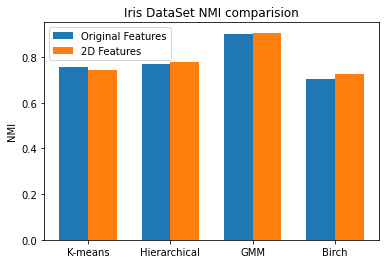

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['K-means', 'Hierarchical', 'GMM', 'Birch']
Original = [0.7581756800057784, 0.770083661648787, 0.8996935451597474, 0.7050989012575003]
PCA = [0.7419116631817835, 0.77766315794623, 0.9071342069456776, 0.7269866707832477]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Original, width, label='Original Features')
rects2 = ax.bar(x + width/2, PCA, width, label='2D Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('NMI')
ax.set_title('Iris DataSet NMI comparision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()






Breast Cancer Dataset


Kmeans 

NMI mean original:  0.464793327921608

NMI mean after PCA:  0.464793327921608


Hierarchical

NMI mean original: 0.31908185424236946

NMI mean after PCA: 0.371924355512926


GMM

NMI mean original:   0.7061254214484896

NMI mean after PCA:  0.6470261554158522

Birch

NMI mean original: 0.31908185424236946

NMI mean after PCA: 0.371924355512926


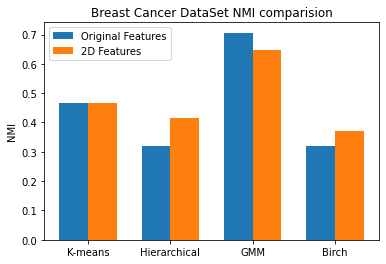

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['K-means', 'Hierarchical', 'GMM', 'Birch']
Original = [0.464793327921608, 0.31908185424236946, 0.7061254214484896, 0.31908185424236946]
PCA = [0.464793327921608, 0.4160766539899293, 0.6470261554158522, 0.371924355512926]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Original, width, label='Original Features')
rects2 = ax.bar(x + width/2, PCA, width, label='2D Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('NMI')
ax.set_title('Breast Cancer DataSet NMI comparision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


Wine Dataset

 

Kmeans 

NMI mean original:  0.42875685976453537

NMI mean after PCA:  0.42875685976453537


Hierarchical

NMI mean original: 0.4160766539899293

NMI mean after PCA: 0.4160766539899293


GMM

NMI mean original:   0.5691791301404323

NMI mean after PCA:  0.4170193903447366

Birch

NMI mean original: 0.4160766539899293

NMI mean after PCA: 0.4160766539899293


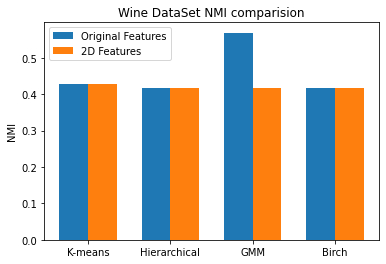

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['K-means', 'Hierarchical', 'GMM', 'Birch']
Original = [0.42875685976453537,  0.4160766539899293, 0.5691791301404323, 0.4160766539899293]
PCA = [0.42875685976453537, 0.4160766539899293, 0.4170193903447366, 0.4160766539899293]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Original, width, label='Original Features')
rects2 = ax.bar(x + width/2, PCA, width, label='2D Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('NMI')
ax.set_title('Wine DataSet NMI comparision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()